<a href="https://colab.research.google.com/github/M-Sravanthi/PyTorchTutorial/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.8.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

geospatial analysis (environment and nature), face detection/identification (apps), voice recognition apps

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in ML - when the model performs well on trained data but not on the test data. Similarly, underfitting is when the model doesn't perform well neither on training data nor on test data. Loss curves can be used to identify overfitting - - google developers explanation.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Ways to prevent overfitting in a model -
1. Data should resemble real world data and should cover all types variability. Split your data into train and test.
2. Simplify the model
3. Cross-validation (data)- We can split our dataset into k groups (k-fold cross-validation). We let one of the groups to be the testing set (please see hold-out
    explanation) and the others as the training set, and repeat this process until each individual group has been used as the testing set (e.g., k repeats).
  Unlike hold-out, cross-validation allows all data to be eventually used for training but is also more computationally expensive than hold-out.
  Data augmentation - if you data size is too small artificially increase the data - included rotated, rescaled, flipped images of the same.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [4]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
train_data = datasets.MNIST(
                            train=True,
                            root = 'Data',
                            download = True,
                            transform= torchvision.transforms.ToTensor(),
                            target_transform=None
                            )

test_data = datasets.MNIST(train = False,
                           root = 'Data',
                           download = True,
                           transform=torchvision.transforms.ToTensor(),
                           target_transform= None
                           )

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 443kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.2MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [8]:
len(train_data),len(test_data)

(60000, 10000)

In [9]:
image,label = train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 5)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

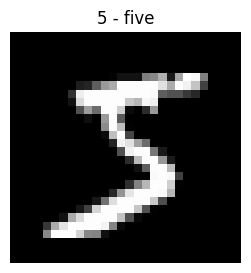

In [10]:
#Visualize the training data
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

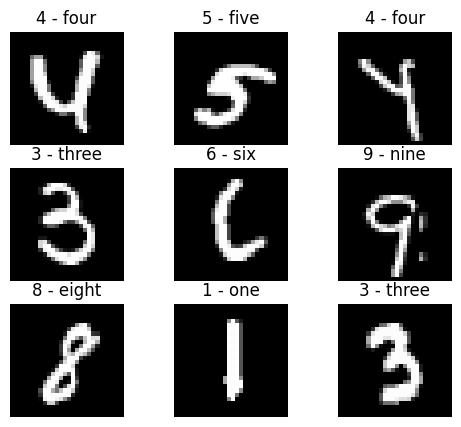

In [11]:
nrows = 3
ncols = 3
fig = plt.figure(figsize=(6,5))
for i in range(1,nrows*ncols+1):
  random_id = torch.randint(0,len(train_data),size = [1]).item()
  img,label = train_data[random_id]
  fig.add_subplot(nrows,ncols,i)
  plt.imshow(img.squeeze(),cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
                              dataset=train_data,
                              batch_size=32,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             shuffle = False,
                             batch_size = 32)

len(train_dataloader),len(test_dataloader)

(1875, 313)

In [13]:
image, label = next(iter(train_dataloader))
image.shape,label

(torch.Size([32, 1, 28, 28]),
 tensor([6, 3, 8, 7, 9, 9, 0, 3, 0, 2, 6, 2, 6, 6, 4, 5, 2, 2, 2, 6, 7, 0, 2, 5,
         6, 4, 5, 0, 8, 6, 3, 5]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
# Replicating model_2 from main video

class MNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels = input_shape,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size=3,
                stride = 1,
                padding= 1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features = hidden_units*7*7,
                    out_features = output_shape)
      )
  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Conv Block 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Conv block 2 shape: {x.shape}")
    x = self.classifier(x)
    #print(f"Classifier shape: {x.shape}")
    return x


In [15]:
model_2 = MNISTModelV2(
                        input_shape=1,
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [16]:
image, label = next(iter(train_dataloader))
model_2(image)

tensor([[ 0.0135,  0.0079, -0.0010,  0.0323,  0.0303, -0.0656, -0.0130,  0.0388,
          0.0269,  0.0072],
        [ 0.0139,  0.0058, -0.0016,  0.0330,  0.0293, -0.0670, -0.0104,  0.0363,
          0.0260,  0.0062],
        [ 0.0102,  0.0048, -0.0049,  0.0347,  0.0288, -0.0648, -0.0100,  0.0380,
          0.0250,  0.0072],
        [ 0.0131,  0.0083, -0.0020,  0.0311,  0.0292, -0.0649, -0.0129,  0.0394,
          0.0261,  0.0059],
        [ 0.0132,  0.0056, -0.0013,  0.0327,  0.0283, -0.0661, -0.0111,  0.0378,
          0.0264,  0.0051],
        [ 0.0128,  0.0082, -0.0025,  0.0329,  0.0298, -0.0657, -0.0143,  0.0383,
          0.0275,  0.0074],
        [ 0.0132,  0.0067, -0.0010,  0.0318,  0.0293, -0.0653, -0.0118,  0.0393,
          0.0267,  0.0072],
        [ 0.0122,  0.0083, -0.0014,  0.0311,  0.0306, -0.0647, -0.0138,  0.0377,
          0.0262,  0.0061],
        [ 0.0126,  0.0088, -0.0028,  0.0324,  0.0298, -0.0642, -0.0119,  0.0390,
          0.0247,  0.0072],
        [ 0.0122,  

In [17]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Setup loss and optimizer and accuracy_fn from helper functions

In [18]:
# Importing helper function from pytorch learning's github page

import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('Already exists skipping download')
else:
  print('Donwloading file')
  requests = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(requests.content)

Donwloading file


In [19]:
#Set up loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

from helper_functions import accuracy_fn

In [20]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device = device):

  train_loss, train_acc =0,0
  model.train()
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X,y = X.to(device), y.to(device)
    # Forward pass
    y_pred = model(X)

    #Calculate loss and acc
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")


In [21]:
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              accuracy_fn,
              device = device):
  test_loss, test_acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device),

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

In [22]:
#Set up timer
def print_train_time(start = float,
                 end = float,
                 device = device):
  """Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time {device}: {total_time:.3f} seconds")
  return total_time

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [23]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
epochs = 5

start_train_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn=accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)

end_train_time = timer()
print_train_time(start = start_train_time,
                 end = end_train_time,
                 device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.3358 | Train acc: 88.38%
Test loss: 0.0700 | Test acc: 97.70%
Epoch: 1
-------
Train loss: 0.0706 | Train acc: 97.81%
Test loss: 0.0575 | Test acc: 98.21%
Epoch: 2
-------
Train loss: 0.0538 | Train acc: 98.30%
Test loss: 0.0453 | Test acc: 98.52%
Epoch: 3
-------
Train loss: 0.0463 | Train acc: 98.55%
Test loss: 0.0397 | Test acc: 98.53%
Epoch: 4
-------
Train loss: 0.0402 | Train acc: 98.73%
Test loss: 0.0476 | Test acc: 98.59%
Train time cpu: 277.278 seconds


277.277911258

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [40]:
# Make predictions with trained model
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device = device):
  pred_probs =[]
  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [48]:
import random
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_labels


[9, 2, 9, 8, 4, 1, 0, 8, 5]

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [49]:
pred_probs = make_predictions(model= model_2,
                 device= device,
                 data = test_samples)

pred_probs = pred_probs.argmax(dim=1)
pred_probs

tensor([0, 2, 9, 8, 4, 1, 0, 8, 5])

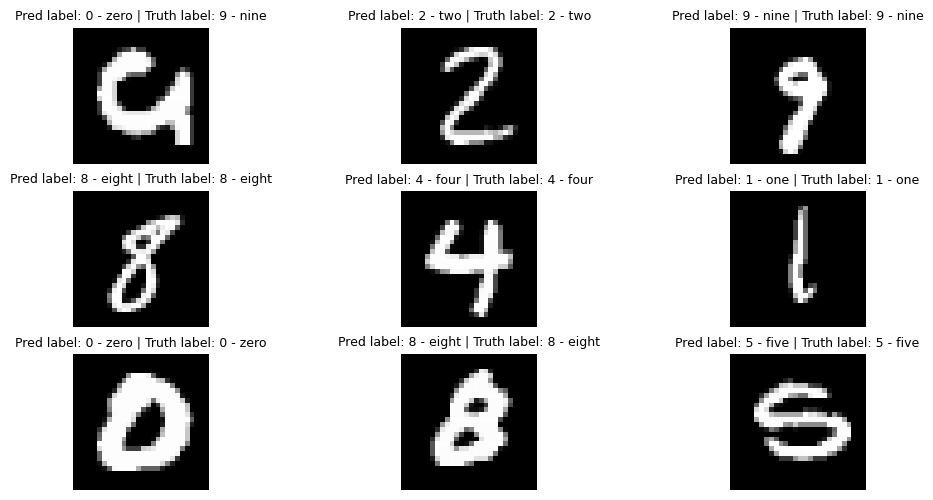

In [50]:
import matplotlib.pyplot as plt

nrows = 3
nclos = 3
fig = plt.figure(figsize=(12,6))
for i, sample in enumerate(test_samples):
  fig.add_subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')
  pred_label = class_names[pred_probs[i]]
  true_label = class_names[test_labels[i]]
  plt.title((f"Pred label: {pred_label} | Truth label: {true_label}"),fontsize = 9)
  plt.axis(False)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?